<center>

# Домашнее задание по Статистическим и Эмпирическим Методам Компьютинга

### Подготовил Куприянов Кирилл Игоревич, студент гр. БПИ 151(1)

### ВАРИАНТ 7

</center> Задание 7

Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Читаем данные из файла

In [2]:
df = pd.read_excel('data.xls')

Преобразуем данные для своего варианта (7) их в удобный формат DataFrame

In [3]:
df_new = pd.DataFrame({'x': list(df['x7'].dropna()), 'y': list(df['y7'].dropna())})
df_new.head()

,x,y
0,40.0,5.0
1,60.0,10.0
2,3.0,13.0
3,17.0,18.0
4,92.0,18.0


Создаем объект KMeans с данным количеством кластеров и обучаем его

In [35]:
def create_kmeans_and_fit(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_new);
    return kmeans

In [6]:
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow'])

Строим графики для оригинальных данных и для кластеризованных по $2, 3$ и $4$ класса.

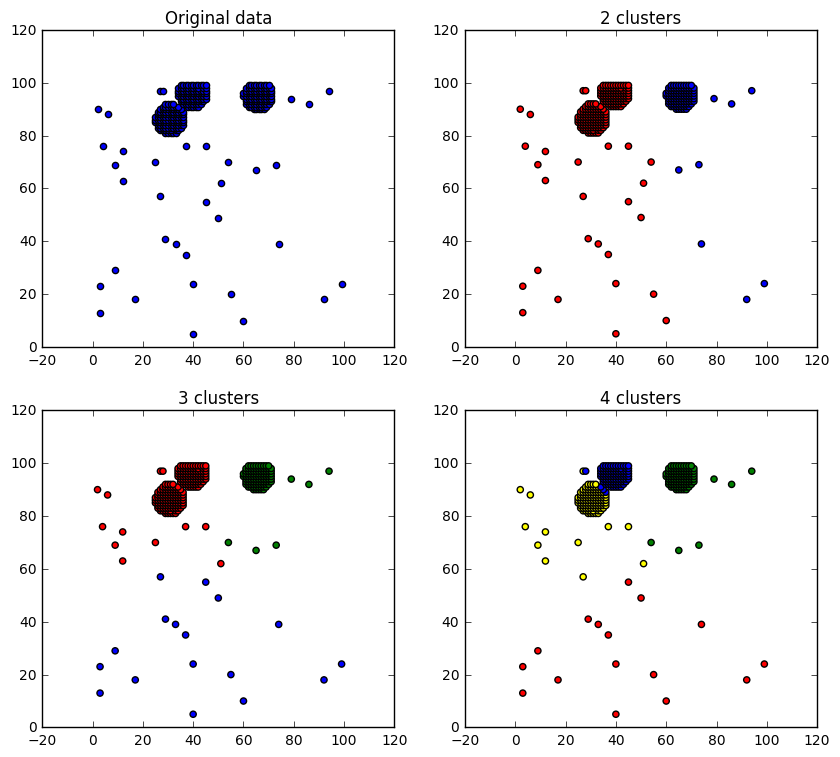

In [34]:
plt.subplots(2,2,figsize=(10, 9))
plt.subplot(2, 2, 1)
plt.title('Original data')
plt.scatter(df_new['x'], df_new['y']);

clusters = [2, 3, 4]

for n_clst in clusters:    
    plt.subplot(2, 2, n_clst)
    plt.title('{} clusters'.format(n_clst))
    km = create_kmeans_and_fit(n_clst)
    plt.scatter(df_new['x'], df_new['y'], c=colormap[km.labels_]);

Выделить все три монетки удалось лишь при количестве классов = $4$. При двух классах, две левые монетки слипаются в одну, поскольку лежат очень близко. Вообще $2$ класса брать безсмысленно, если заранее известно, что кол-во монет = $3$. Выбрав $3$ кластера, двелевые монетки все равно слипаются в одну, из-за шумов внизу. Если бы шумов не было, уже на картинке с тремя кластерами мы бы увидели разбиение на $3$ монетки. И только увеличив число кластеров на $1$, сделав их число равным $4$, мы четко увидели три монетки. Шумы внизу остались в отдельном кластере, и только визуально видно, что это не монета. А $2$ левые монетки, что раньше принадлежали одному кластеру, разделились на $2$ разных.

Таким образом, шумы сильно влияют на визуальную корректность кластеризации данных.